### Q1

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to apply intensity transformation to a single pixel value
def transform_pixel_intensity(pixel_value: int) -> float:
    # Apply transformation for pixel values in the range [50, 150]
    if 50 <= pixel_value <= 150:
        return 1.55 * pixel_value + 22.5
    else:
        return pixel_value

# Function to apply intensity transformation to an entire image
def transform_image_intensity(image: np.ndarray) -> np.ndarray:
    # Create a new image array with the same shape as the input image
    transformed_image = np.zeros(image.shape, dtype=np.uint8)
    
    # Loop through each pixel and apply the intensity transformation
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel = image[row, col]
            transformed_image[row, col] = transform_pixel_intensity(pixel)
    
    return np.array(transformed_image, dtype=np.uint8)


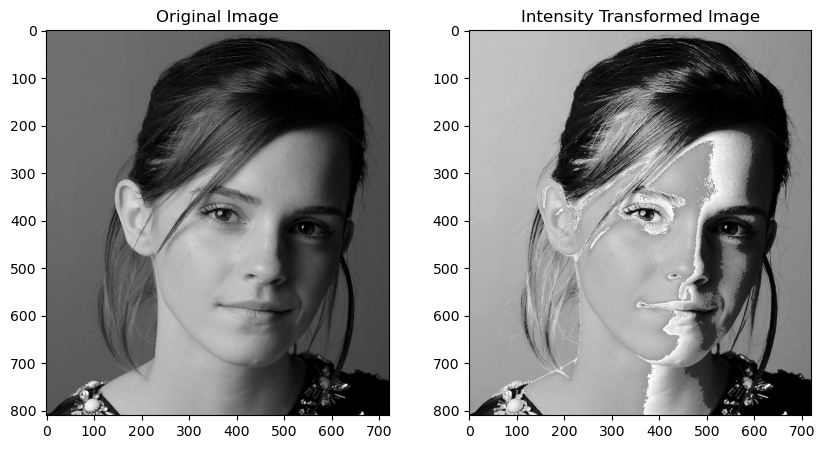

In [5]:
# Read the grayscale image from the file
emma_image = cv2.imread("emma.jpg", cv2.IMREAD_GRAYSCALE)

# Apply intensity transformation to the image
transformed_emma_image = transform_image_intensity(emma_image)

# Display the original image and the intensity transformed image side by side
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(emma_image, cmap='gray')

# Plot the intensity transformed image
plt.subplot(1, 2, 2)
plt.title("Intensity Transformed Image")
plt.imshow(transformed_emma_image, cmap='gray')

plt.show()

### Q2

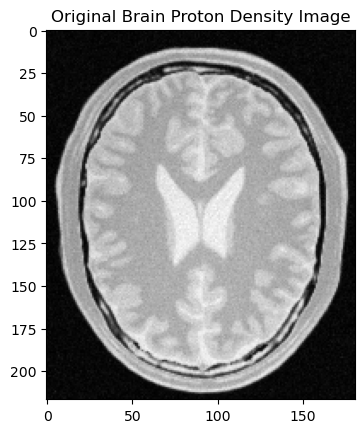

(217, 181)

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load the brain proton density image
brain_proton_img = cv2.imread("brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(brain_proton_img, cmap='gray')
plt.title("Original Brain Proton Density Image")
plt.show()

# Display image shape
brain_proton_img.shape

White Matter Intensity: 188
Gray Matter Intensity: 205


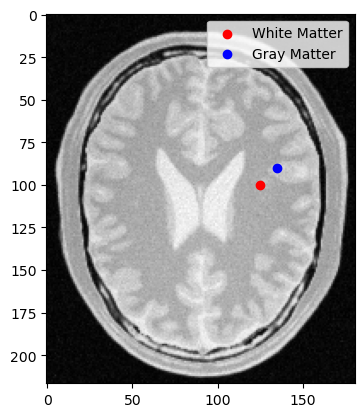

In [9]:
# Define points for white and gray matter in the brain proton density image
white_matter_coordinates = (125, 100)
gray_matter_coordinates = (135, 90)

# Show the brain proton density image
plt.imshow(brain_proton_img, cmap='gray')

# Mark the white and gray matter points on the image
plt.scatter(white_matter_coordinates[0], white_matter_coordinates[1], color='red', label='White Matter')
plt.scatter(gray_matter_coordinates[0], gray_matter_coordinates[1], color='blue', label='Gray Matter')

# Add a legend to the plot for the points
plt.legend()

# Get the pixel intensities at the specified coordinates
white_matter_intensity = brain_proton_img[white_matter_coordinates[1], white_matter_coordinates[0]]
gray_matter_intensity = brain_proton_img[gray_matter_coordinates[1], gray_matter_coordinates[0]]

# Print the pixel intensity values for both points
print(f"White Matter Intensity: {white_matter_intensity}")
print(f"Gray Matter Intensity: {gray_matter_intensity}")

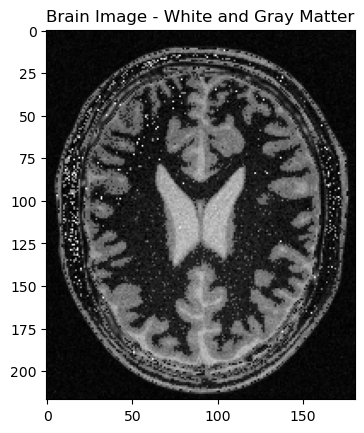

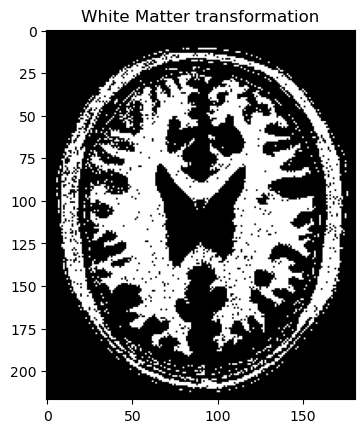

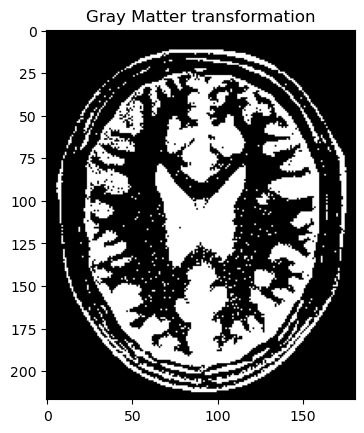

In [11]:
import numpy as np

# Function to accentuate the intensity of white and gray matter in the brain image
def highlight_matter_regions(image):
    # Create a copy of the original image to apply transformations
    enhanced_image = np.copy(image)
    
    # Apply transformation for gray matter (181 <= pixel <= 250) 
    # Gray matter appears brighter than white matter
    gray_matter_region = (image >= 181) & (image <= 250)
    enhanced_image[gray_matter_region] = 1.75 * image[gray_matter_region] + 30
    
    # Apply transformation for white matter (150 <= pixel <= 180)
    # White matter appears darker than gray matter
    white_matter_region = (image >= 150) & (image <= 180)
    enhanced_image[white_matter_region] = 1.55 * image[white_matter_region] + 22.5
    
    return enhanced_image, white_matter_region, gray_matter_region

# Apply the transformation to the brain proton density image
accentuated_brain_image, white_matter_mask, gray_matter_mask = highlight_matter_regions(brain_proton_img)

# Display the transformed brain image with accentuated white and gray matter
plt.imshow(accentuated_brain_image, cmap='gray')
plt.title("Brain Image - White and Gray Matter")
plt.show()

# Display the white matter mask (regions identified as white matter)
plt.imshow(white_matter_mask, cmap='gray')
plt.title("White Matter transformation")
plt.show()

# Display the gray matter mask (regions identified as gray matter)
plt.imshow(gray_matter_mask, cmap='gray')
plt.title("Gray Matter transformation")
plt.show()


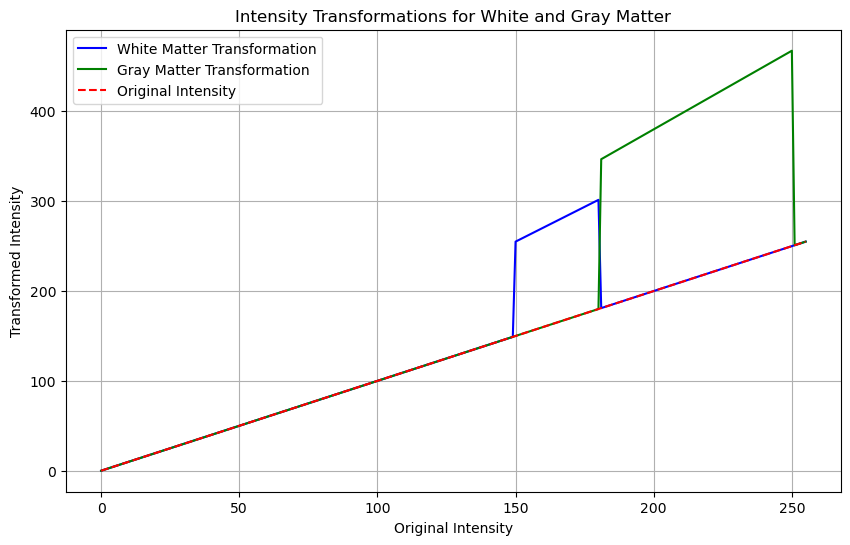

In [12]:
# Generate intensity range (0-255)
intensity_values = np.arange(0, 256)

# Compute the intensity transformation for gray matter (181 <= x <= 250)
# Gray matter transformation: 1.75 * x + 30 for the given range
transformed_gray_matter = np.array([1.75 * intensity + 30 if 181 <= intensity <= 250 else intensity for intensity in intensity_values])

# Compute the intensity transformation for white matter (150 <= x <= 180)
# White matter transformation: 1.55 * x + 22.5 for the given range
transformed_white_matter = np.array([1.55 * intensity + 22.5 if 150 <= intensity <= 180 else intensity for intensity in intensity_values])

# Plot the intensity transformations
plt.figure(figsize=(10, 6))

# Plot white matter transformation
plt.plot(intensity_values, transformed_white_matter, label='White Matter Transformation', color='blue')

# Plot gray matter transformation
plt.plot(intensity_values, transformed_gray_matter, label='Gray Matter Transformation', color='green')

# Plot the identity line (original intensity values)
plt.plot(intensity_values, intensity_values, label='Original Intensity', linestyle='--', color='red')

# Add title and axis labels
plt.title('Intensity Transformations for White and Gray Matter')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')

# Show the legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


### Q3

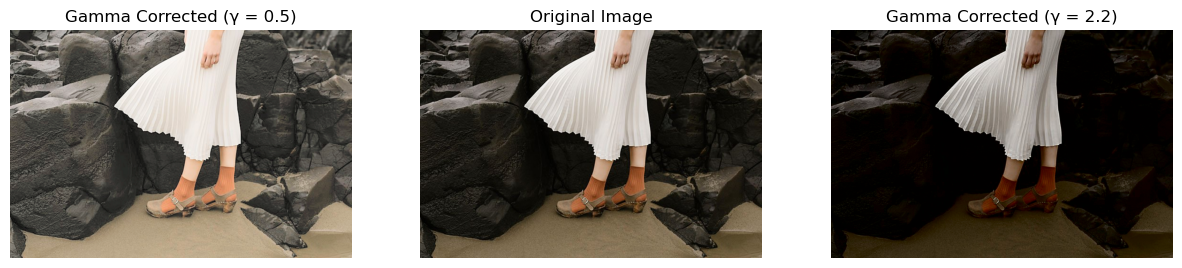

In [13]:
bgr_img = cv2.imread("highlights_and_shadows.jpg")

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Convert the input BGR image to LAB color space
lab_image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2LAB)

# Step 2: Split the LAB image into L, A, and B channels
L_channel, A_channel, B_channel = cv2.split(lab_image)

# Step 3: Normalize the L channel to the range [0, 1]
L_normalized = L_channel / 255.0

# Step 4: Apply gamma correction with gamma = 0.5 (low gamma)
gamma_value_low = 0.5
L_gamma_corrected_low = np.power(L_normalized, gamma_value_low)

# Step 5: Rescale the corrected L channel back to the range [0, 255] and convert to uint8
L_gamma_low_uint8 = np.uint8(L_gamma_corrected_low * 255)

# Step 6: Merge the gamma-corrected L channel with original A and B channels
lab_gamma_corrected_low = cv2.merge((L_gamma_low_uint8, A_channel, B_channel))

# Step 7: Convert the LAB image back to BGR color space (for visualization)
image_gamma_low_corrected = cv2.cvtColor(lab_gamma_corrected_low, cv2.COLOR_LAB2BGR)

# Step 8: Apply gamma correction with gamma = 2.2 (high gamma)
gamma_value_high = 2.2
L_gamma_corrected_high = np.power(L_normalized, gamma_value_high)

# Step 9: Rescale the high gamma-corrected L channel back to [0, 255] and convert to uint8
L_gamma_high_uint8 = np.uint8(L_gamma_corrected_high * 255)

# Step 10: Merge the corrected L channel with original A and B channels
lab_gamma_corrected_high = cv2.merge((L_gamma_high_uint8, A_channel, B_channel))

# Step 11: Convert the LAB image back to BGR color space
image_gamma_high_corrected = cv2.cvtColor(lab_gamma_corrected_high, cv2.COLOR_LAB2BGR)

# Step 12: Display original and gamma corrected images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Display gamma-corrected image with gamma = 0.5
axes[0].imshow(cv2.cvtColor(image_gamma_low_corrected, cv2.COLOR_BGR2RGB))
axes[0].set_title("Gamma Corrected (γ = 0.5)")

# Display original image
axes[1].imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
axes[1].set_title("Original Image")

# Display gamma-corrected image with gamma = 2.2
axes[2].imshow(cv2.cvtColor(image_gamma_high_corrected, cv2.COLOR_BGR2RGB))
axes[2].set_title("Gamma Corrected (γ = 2.2)")

# Hide axis for cleaner visualization
for ax in axes:
    ax.axis('off')

# Show the figure
plt.show()


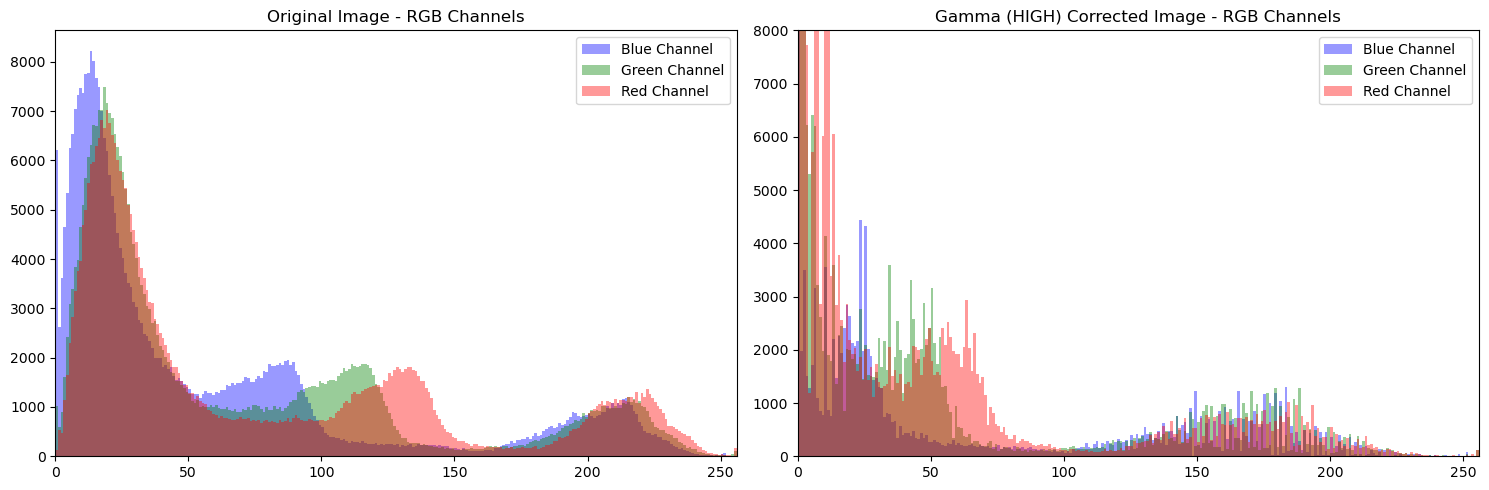

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming original_image is the original BGR image and high_gamma_corrected_image is the gamma-corrected image

# Step 1: Create subplots for the histograms of the original and gamma-corrected images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Step 2: Plot the histogram of RGB channels for the original image
axes[0].set_title("Original Image - RGB Channels")
axes[0].hist(bgr_img[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')  # Blue channel
axes[0].hist(bgr_img[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')  # Green channel
axes[0].hist(bgr_img[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')   # Red channel
axes[0].set_xlim([0, 256])  # Set x-axis range for intensity values (0-255)
axes[0].legend()

# Step 3: Plot the histogram of RGB channels for the high gamma-corrected image
axes[1].set_title("Gamma (HIGH) Corrected Image - RGB Channels")
axes[1].hist(image_gamma_high_corrected[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')  # Blue channel
axes[1].hist(image_gamma_high_corrected[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')  # Green channel
axes[1].hist(image_gamma_high_corrected[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')   # Red channel
axes[1].set_xlim([0, 256])  # Set x-axis range for intensity values (0-255)
axes[1].set_ylim([0, 8000])  # Set y-axis limit to reduce the impact of high-frequency zero counts
axes[1].legend()

# Step 4: Adjust layout and display the figure
plt.tight_layout()
plt.show()


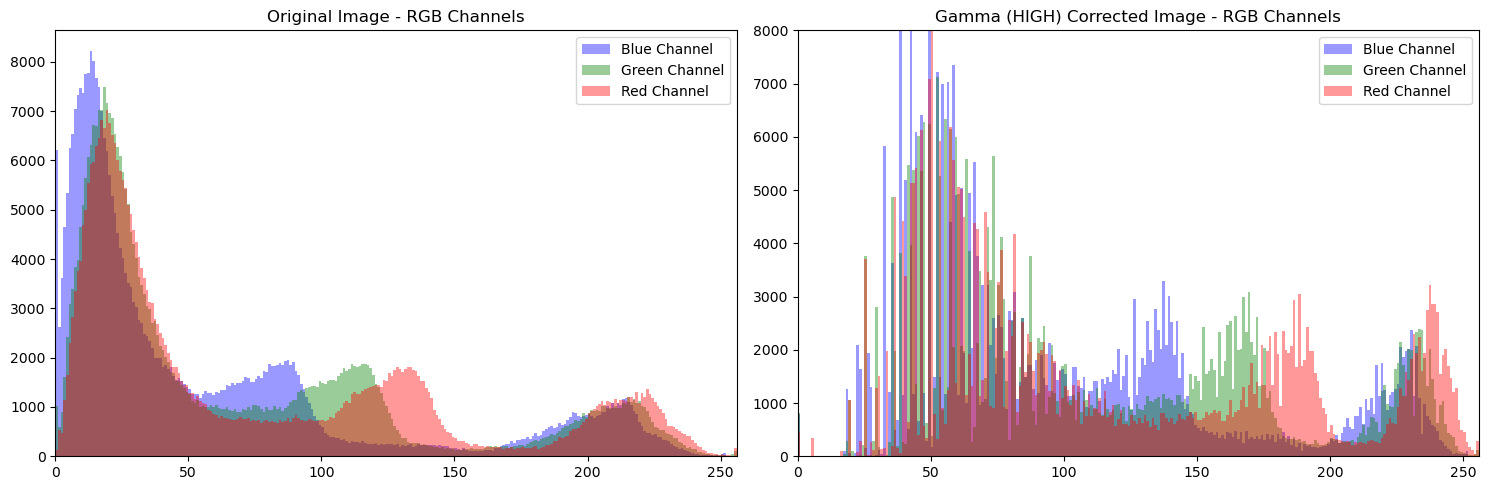

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming original_image is the original BGR image and high_gamma_corrected_image is the gamma-corrected image

# Step 1: Create subplots for the histograms of the original and gamma-corrected images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Step 2: Plot the histogram of RGB channels for the original image
axes[0].set_title("Original Image - RGB Channels")
axes[0].hist(bgr_img[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')  # Blue channel
axes[0].hist(bgr_img[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')  # Green channel
axes[0].hist(bgr_img[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')   # Red channel
axes[0].set_xlim([0, 256])  # Set x-axis range for intensity values (0-255)
axes[0].legend()

# Step 3: Plot the histogram of RGB channels for the high gamma-corrected image
axes[1].set_title("Gamma (HIGH) Corrected Image - RGB Channels")
axes[1].hist(image_gamma_low_corrected[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')  # Blue channel
axes[1].hist(image_gamma_low_corrected[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')  # Green channel
axes[1].hist(image_gamma_low_corrected[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')   # Red channel
axes[1].set_xlim([0, 256])  # Set x-axis range for intensity values (0-255)
axes[1].set_ylim([0, 8000])  # Set y-axis limit to reduce the impact of high-frequency zero counts
axes[1].legend()

# Step 4: Adjust layout and display the figure
plt.tight_layout()
plt.show()


### Q4

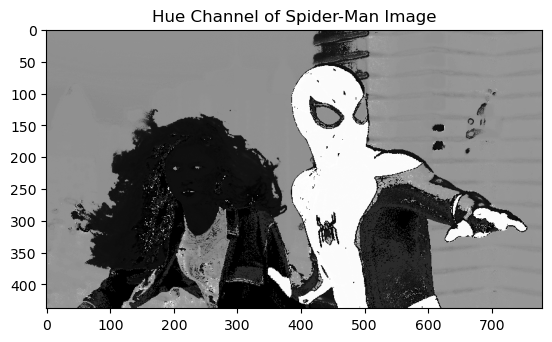

Min and Max of Hue Channel: 0, 179
Min and Max of Saturation Channel: 0, 185
Min and Max of Value Channel: 8, 231


In [36]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Step 1: Read the original Spider-Man image in BGR color space
spiderman_original_image = cv2.imread("spider.png")

# Step 2: Convert the BGR image to HSV color space
spiderman_hsv_image = cv2.cvtColor(spiderman_original_image, cv2.COLOR_BGR2HSV)

# Step 3: Extract the Hue, Saturation, and Value (HSV) channels
spiderman_hue_channel = spiderman_hsv_image[:, :, 0]      # Hue channel
spiderman_saturation_channel = spiderman_hsv_image[:, :, 1]  # Saturation channel
spiderman_value_channel = spiderman_hsv_image[:, :, 2]    # Value channel

# Step 4: Display the shape of the HSV image and visualize the Hue channel
plt.imshow(spiderman_hue_channel, cmap="gray")
plt.title("Hue Channel of Spider-Man Image")
plt.show()

# Step 5: Print the minimum and maximum values for each HSV channel
print(f"Min and Max of Hue Channel: {np.min(spiderman_hue_channel)}, {np.max(spiderman_hue_channel)}")
print(f"Min and Max of Saturation Channel: {np.min(spiderman_saturation_channel)}, {np.max(spiderman_saturation_channel)}")
print(f"Min and Max of Value Channel: {np.min(spiderman_value_channel)}, {np.max(spiderman_value_channel)}")





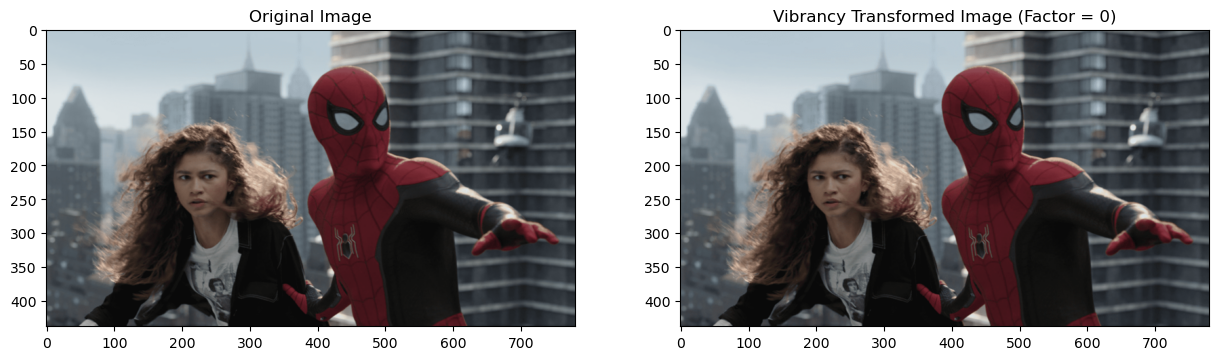

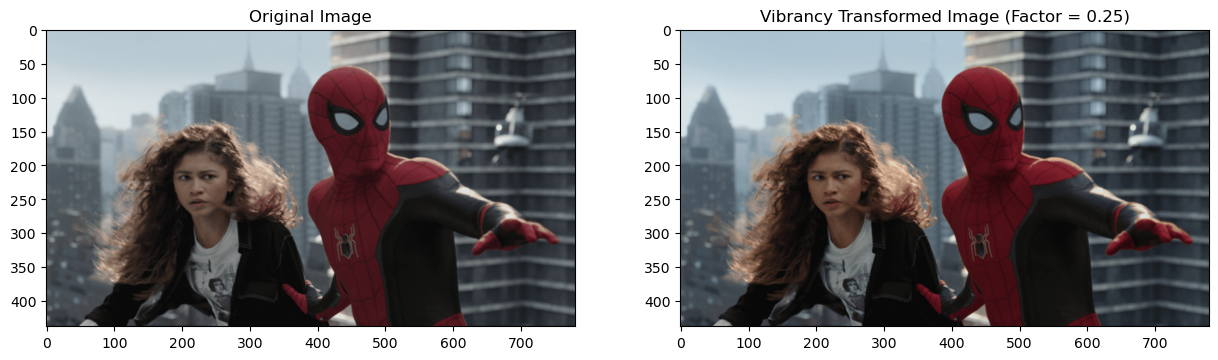

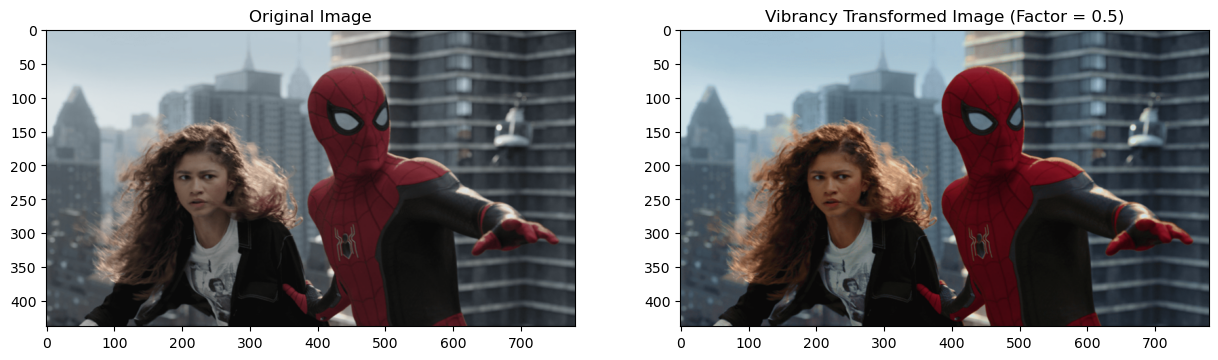

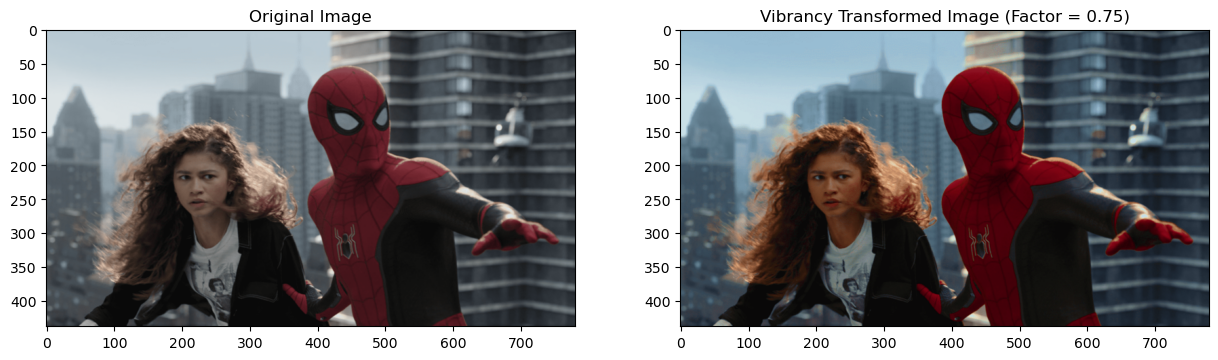

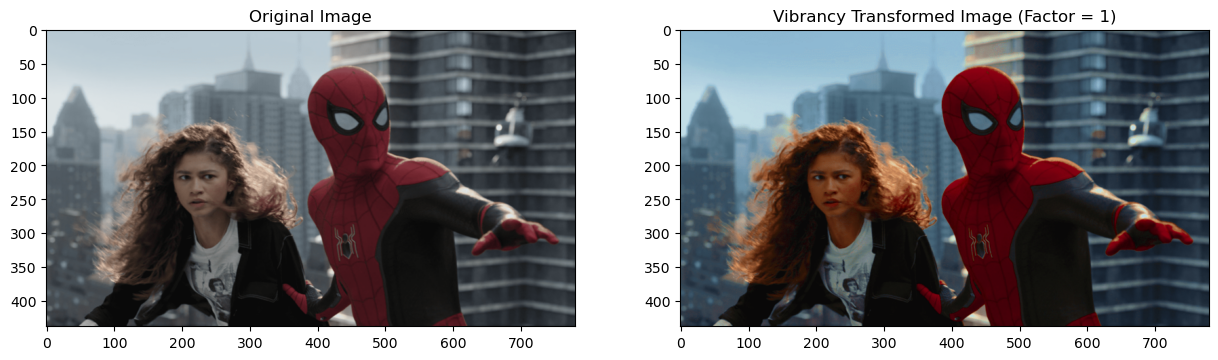

In [35]:
# Define the vibrancy transformation function
def apply_vibrancy(input_pixel_value: int, factor: float, sigma: int = 70) -> float:
    """Apply vibrancy transformation to a pixel value in the Saturation channel."""
    return min(input_pixel_value + factor * 128 * math.exp(-(input_pixel_value - 128)**2 / (2 * sigma**2)), 255)

# Initialize a dictionary to store transformed images for different vibrancy factors
vibrancy_transformed_images = {0: None, 0.25: None, 0.5: None, 0.75: None, 1: None}

# Step 6: Iterate over different vibrancy factors and apply transformations
for vibrancy_factor in vibrancy_transformed_images.keys():
    # Create a new Saturation channel after applying vibrancy transformation
    transformed_saturation_channel = np.zeros(spiderman_saturation_channel.shape, dtype=np.uint8)
    
    # Apply vibrancy transformation to each pixel in the Saturation channel
    for row in range(spiderman_saturation_channel.shape[0]):
        for col in range(spiderman_saturation_channel.shape[1]):
            transformed_saturation_channel[row][col] = apply_vibrancy(spiderman_saturation_channel[row][col], factor=vibrancy_factor)

    # Step 7: Merge the transformed Saturation channel with the original Hue and Value channels
    transformed_hsv_image = cv2.merge((spiderman_hue_channel, transformed_saturation_channel, spiderman_value_channel))

    # Convert the transformed HSV image back to BGR color space
    vibrancy_transformed_image_bgr = cv2.cvtColor(transformed_hsv_image, cv2.COLOR_HSV2BGR)

    # Store the vibrancy-transformed image in the dictionary
    vibrancy_transformed_images[vibrancy_factor] = vibrancy_transformed_image_bgr

    # Step 8: Visualize the original and transformed images side by side
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

    # Display the original image
    axs[0].set_title("Original Image")
    axs[0].imshow(cv2.cvtColor(spiderman_original_image, cv2.COLOR_BGR2RGB))

    # Display the vibrancy-transformed image
    axs[1].set_title(f"Vibrancy Transformed Image (Factor = {vibrancy_factor})")
    axs[1].imshow(cv2.cvtColor(vibrancy_transformed_image_bgr, cv2.COLOR_BGR2RGB))

    # Show the plot
    plt.show()

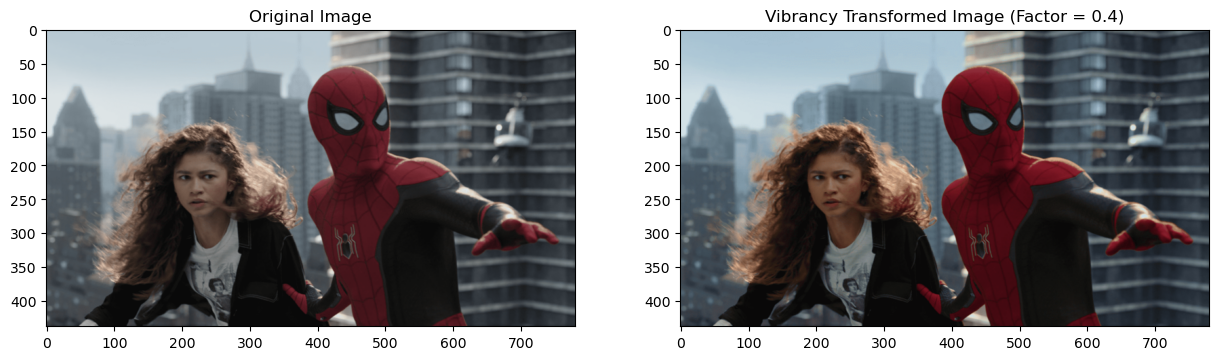

In [22]:
# Apply vibrancy transformation with a fixed factor (e.g., a = 0.4)
vibrancy_factor_fixed = 0.4

# Create a new Saturation channel after applying vibrancy transformation with the fixed factor
transformed_saturation_fixed = np.zeros(spiderman_saturation_channel.shape, dtype=np.uint8)

# Apply vibrancy transformation to each pixel
for row in range(spiderman_saturation_channel.shape[0]):
    for col in range(spiderman_saturation_channel.shape[1]):
        transformed_saturation_fixed[row][col] = apply_vibrancy(spiderman_saturation_channel[row][col], factor=vibrancy_factor_fixed)

# Merge the transformed Saturation channel with the original Hue and Value channels
transformed_hsv_fixed = cv2.merge((spiderman_hue_channel, transformed_saturation_fixed, spiderman_value_channel))

# Convert the transformed HSV image back to BGR color space
final_transformed_image = cv2.cvtColor(transformed_hsv_fixed, cv2.COLOR_HSV2BGR)

# Visualize the transformation with the fixed factor
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Display the original image
axs[0].set_title("Original Image")
axs[0].imshow(cv2.cvtColor(spiderman_original_image, cv2.COLOR_BGR2RGB))

# Display the final vibrancy-transformed image
axs[1].set_title(f"Vibrancy Transformed Image (Factor = {vibrancy_factor_fixed})")
axs[1].imshow(cv2.cvtColor(final_transformed_image, cv2.COLOR_BGR2RGB))

# Show the plot
plt.show()

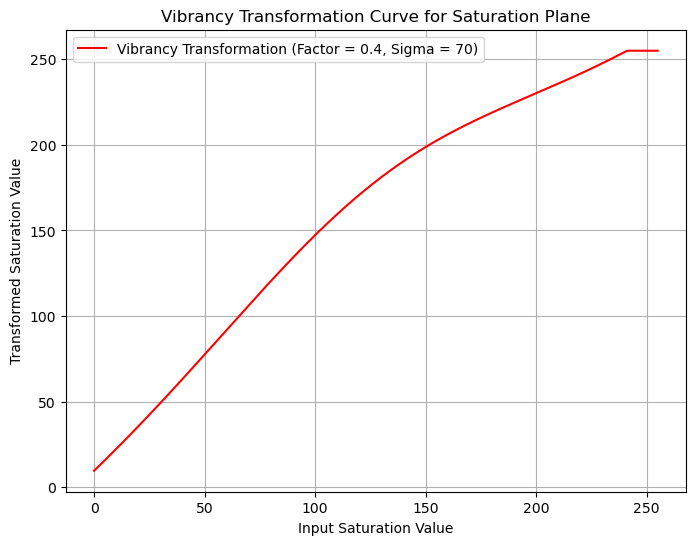

In [34]:
# Step 9: Generate and visualize the vibrancy transformation curve for the Saturation plane
input_pixel_values = np.arange(0, 256)  # Input pixel values (0-255)
output_pixel_values = [apply_vibrancy(x, vibrancy_factor_fixed, sigma=70) for x in input_pixel_values]

# Plot the vibrancy transformation curve
plt.figure(figsize=(8, 6))
plt.plot(input_pixel_values, output_pixel_values, label=f'Vibrancy Transformation (Factor = {vibrancy_factor_fixed}, Sigma = 70)', color='red')
plt.xlabel('Input Saturation Value')
plt.ylabel('Transformed Saturation Value')
plt.title('Vibrancy Transformation Curve for Saturation Plane')
plt.legend()
plt.grid(True)
plt.show()

### Q9

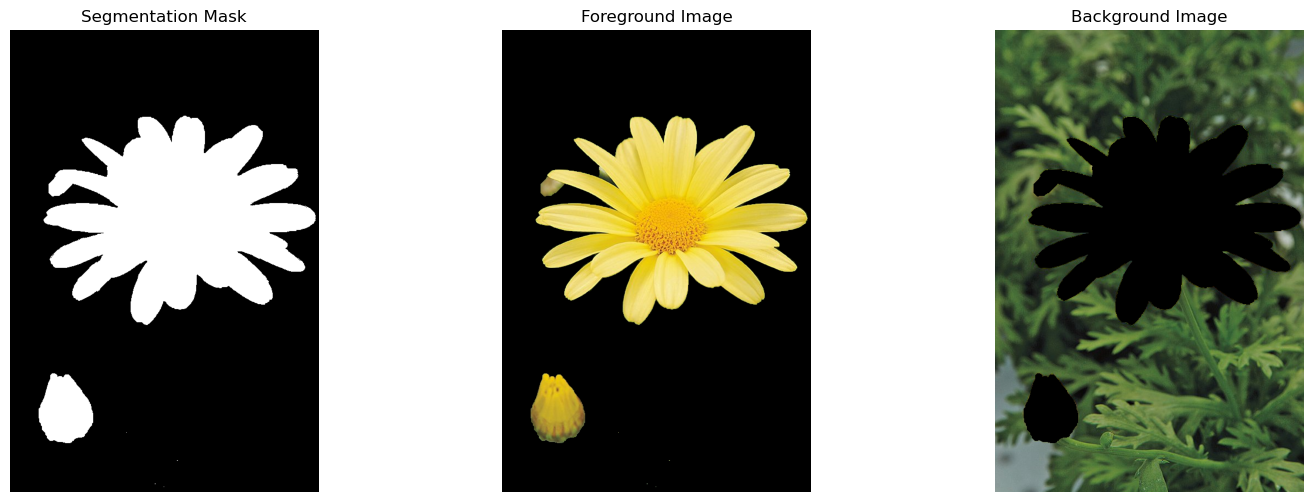

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the original Daisy image and convert it from BGR to RGB color space
daisy_image_bgr = cv2.imread("daisy.jpg")
daisy_image_rgb = cv2.cvtColor(daisy_image_bgr, cv2.COLOR_BGR2RGB)

# Step 2: Create an initial mask for GrabCut
initial_mask = np.zeros(daisy_image_rgb.shape[:2], dtype=np.uint8)

# Step 3: Initialize background and foreground models required for the GrabCut algorithm
bgd_model = np.zeros((1, 65), dtype=np.float64)
fgd_model = np.zeros((1, 65), dtype=np.float64)

# Step 4: Define a rectangle around the foreground object for segmentation
rect = (50, 50, daisy_image_rgb.shape[1] - 50, daisy_image_rgb.shape[0] - 50)

# Step 5: Apply the GrabCut algorithm to segment the foreground from the background
cv2.grabCut(daisy_image_rgb, initial_mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Step 6: Modify the mask: probable/definite background becomes 0, and probable/definite foreground becomes 1
final_mask = np.where((initial_mask == 2) | (initial_mask == 0), 0, 1).astype('uint8')

# Step 7: Extract the segmented foreground using the mask
foreground_image = daisy_image_rgb * final_mask[:, :, np.newaxis]

# Step 8: Extract the background (everything outside the foreground)
background_image = daisy_image_rgb * (1 - final_mask[:, :, np.newaxis])

# Step 9: Display the mask, foreground, and background side by side
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Display the segmentation mask
ax[0].imshow(final_mask, cmap='gray')
ax[0].set_title('Segmentation Mask')
ax[0].axis('off')

# Display the extracted foreground
ax[1].imshow(foreground_image)
ax[1].set_title('Foreground Image')
ax[1].axis('off')

# Display the extracted background
ax[2].imshow(background_image)
ax[2].set_title('Background Image')
ax[2].axis('off')

plt.show()



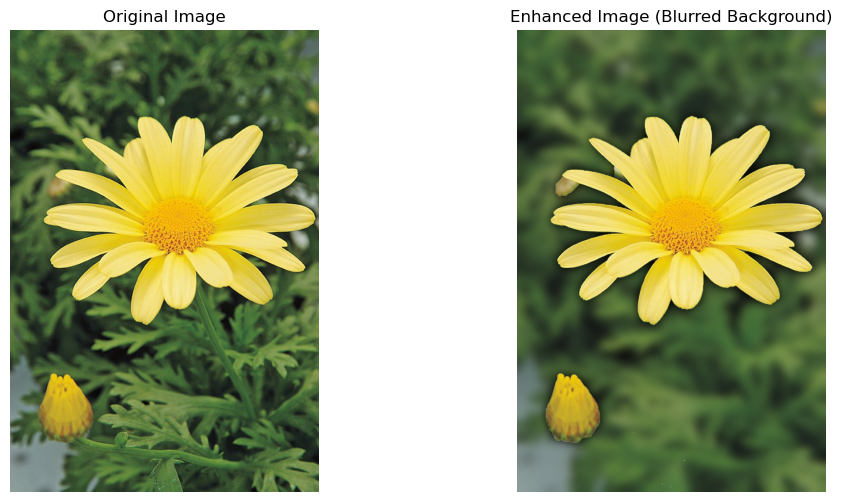

In [31]:
# Step 10: Apply Gaussian blur to the background
blurred_background_image = cv2.GaussianBlur(background_image, (55, 55), 0)

# Step 11: Combine the sharp foreground with the blurred background
enhanced_image = np.where(final_mask[:, :, np.newaxis] == 1, daisy_image_rgb, blurred_background_image)

# Step 12: Display the original and enhanced images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
ax[0].imshow(daisy_image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Display the enhanced image with blurred background
ax[1].imshow(enhanced_image)
ax[1].set_title('Enhanced Image (Blurred Background)')
ax[1].axis('off')

plt.show()



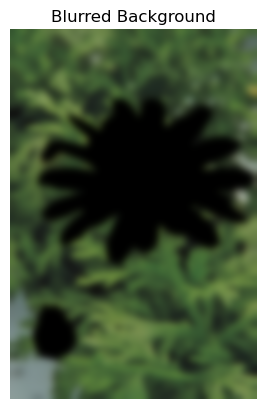

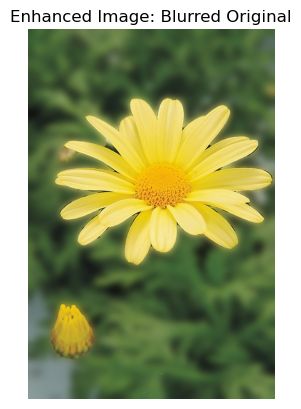

In [32]:
# Step 13: Display the blurred background image
plt.title("Blurred Background")
plt.imshow(blurred_background_image)
plt.axis('off')
plt.show()

# Step 14: Apply Gaussian blur to the original image
blurred_daisy_image_rgb = cv2.GaussianBlur(daisy_image_rgb, (55, 55), 0)

# Step 15: Combine the sharp foreground with the blurred original image
enhanced_blurred_original = np.where(final_mask[:, :, np.newaxis] == 1, daisy_image_rgb, blurred_daisy_image_rgb)

# Step 16: Display the enhanced image with the blurred original image
plt.title("Enhanced Image: Blurred Original")
plt.imshow(enhanced_blurred_original)
plt.axis('off')
plt.show()